In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [2]:
df = pd.read_csv('../data/healthcare-dataset-stroke-data.csv')

print(df.info())

quantitative_columns = ['age', 'avg_glucose_level', 'bmi']
df_quant = df[quantitative_columns]

categorical_columns = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
df_cat = df[categorical_columns]

print("Количественные данные:")
print(df_quant.head())
print("\nКатегориальные данные:")
print(df_cat.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None
Количественные данные:
    age  avg_glucose_level   bmi
0  67.0             228.69  36.6
1  61.0             202.21   NaN
2  80.0             105.92  32

In [3]:
print("ОПИСАТЕЛЬНАЯ СТАТИСТИКА (ВСТРОЕННЫЕ ФУНКЦИИ)")
print("="*50)

for col in df_quant.columns:
    print(f"\n--- Столбец: {col} ---")
    print(f"Медиана: {df_quant[col].median()}")
    print(f"Среднее: {df_quant[col].mean()}")

    mode_result = df_quant[col].mode()
    print(f"Мода: {mode_result.iloc[0] if not mode_result.empty else 'No mode'}")
    print(f"Дисперсия: {df_quant[col].var()}")
    print(f"Стандартное отклонение: {df_quant[col].std()}")
    print(f"Квартили:\n{df_quant[col].quantile([0.25, 0.5, 0.75])}")
    Q1 = df_quant[col].quantile(0.25)
    Q3 = df_quant[col].quantile(0.75)
    IQR = Q3 - Q1
    print(f"Межквартильный размах (IQR): {IQR}")

ОПИСАТЕЛЬНАЯ СТАТИСТИКА (ВСТРОЕННЫЕ ФУНКЦИИ)

--- Столбец: age ---
Медиана: 45.0
Среднее: 43.226614481409
Мода: 78.0
Дисперсия: 511.33179182433673
Стандартное отклонение: 22.61264672311352
Квартили:
0.25    25.0
0.50    45.0
0.75    61.0
Name: age, dtype: float64
Межквартильный размах (IQR): 36.0

--- Столбец: avg_glucose_level ---
Медиана: 91.88499999999999
Среднее: 106.1476771037182
Мода: 93.88
Дисперсия: 2050.6008199113808
Стандартное отклонение: 45.283560150582026
Квартили:
0.25     77.245
0.50     91.885
0.75    114.090
Name: avg_glucose_level, dtype: float64
Межквартильный размах (IQR): 36.845

--- Столбец: bmi ---
Медиана: 28.1
Среднее: 28.893236911794666
Мода: 28.7
Дисперсия: 61.68636419426877
Стандартное отклонение: 7.854066729680158
Квартили:
0.25    23.5
0.50    28.1
0.75    33.1
Name: bmi, dtype: float64
Межквартильный размах (IQR): 9.600000000000001


In [4]:
print("\n\nОПИСАТЕЛЬНАЯ СТАТИСТИКА (РУЧНОЙ РАСЧЕТ)")
print("="*50)

for col in df_quant.columns:
    print(f"\n--- Столбец: {col} ---")
    data = df_quant[col].dropna()
    n = len(data)

    sorted_data = np.sort(data)
    mid = n // 2
    if n % 2 == 0:
        median_manual = (sorted_data[mid - 1] + sorted_data[mid]) / 2
    else:
        median_manual = sorted_data[mid]
    print(f"Медиана: {median_manual}")

    mean_manual = np.sum(data) / n
    print(f"Среднее: {mean_manual}")

    values, counts = np.unique(data, return_counts=True)
    max_count_index = np.argmax(counts)
    mode_manual = values[max_count_index] if counts[max_count_index] > 1 else "No mode"
    print(f"Мода: {mode_manual}")

    variance_manual = np.sum((data - mean_manual) ** 2) / n
    print(f"Дисперсия (n): {variance_manual}")

    variance_manual_unbiased = np.sum((data - mean_manual) ** 2) / (n - 1)
    print(f"Дисперсия (n-1): {variance_manual_unbiased}")

    std_manual = np.sqrt(variance_manual_unbiased)
    print(f"Стандартное отклонение: {std_manual}")

    Q1_manual = np.percentile(data, 25, method='linear')
    Q3_manual = np.percentile(data, 75, method='linear')
    print(f"Q1 (25-й перцентиль): {Q1_manual}")
    print(f"Q3 (75-й перцентиль): {Q3_manual}")

    IQR_manual = Q3_manual - Q1_manual
    print(f"Межквартильный размах (IQR): {IQR_manual}")



ОПИСАТЕЛЬНАЯ СТАТИСТИКА (РУЧНОЙ РАСЧЕТ)

--- Столбец: age ---
Медиана: 45.0
Среднее: 43.226614481409
Мода: 78.0
Дисперсия (n): 511.2317268944283
Дисперсия (n-1): 511.33179182433514
Стандартное отклонение: 22.61264672311349
Q1 (25-й перцентиль): 25.0
Q3 (75-й перцентиль): 61.0
Межквартильный размах (IQR): 36.0

--- Столбец: avg_glucose_level ---
Медиана: 91.88499999999999
Среднее: 106.1476771037182
Мода: 93.88
Дисперсия (n): 2050.1995281657964
Дисперсия (n-1): 2050.600819911376
Стандартное отклонение: 45.28356015058198
Q1 (25-й перцентиль): 77.245
Q3 (75-й перцентиль): 114.09
Межквартильный размах (IQR): 36.845

--- Столбец: bmi ---
Медиана: 28.1
Среднее: 28.893236911794663
Мода: 28.7
Дисперсия (n): 61.67379822071126
Дисперсия (n-1): 61.68636419426886
Стандартное отклонение: 7.854066729680164
Q1 (25-й перцентиль): 23.5
Q3 (75-й перцентиль): 33.1
Межквартильный размах (IQR): 9.600000000000001


In [5]:
print("\n\nПРОВЕРКА РАСХОЖДЕНИЙ")
print("="*50)
tolerance = 1e-10

for col in df_quant.columns:
    print(f"\n--- Проверка для столбца '{col}' ---")
    data = df_quant[col].dropna()

    median_pandas = data.median()
    median_manual = np.percentile(data, 50, method='linear')
    print(f"Медиана: Pandas={median_pandas}, Manual={median_manual}, Совпадают? {np.isclose(median_pandas, median_manual, rtol=tolerance)}")

    mean_pandas = data.mean()
    mean_manual = np.sum(data) / len(data)
    print(f"Среднее: Pandas={mean_pandas}, Manual={mean_manual}, Совпадают? {np.isclose(mean_pandas, mean_manual, rtol=tolerance)}")

    var_pandas = data.var()
    var_manual = np.sum((data - mean_manual) ** 2) / (len(data) - 1)
    print(f"Дисперсия: Pandas={var_pandas}, Manual={var_manual}, Совпадают? {np.isclose(var_pandas, var_manual, rtol=tolerance)}")



ПРОВЕРКА РАСХОЖДЕНИЙ

--- Проверка для столбца 'age' ---
Медиана: Pandas=45.0, Manual=45.0, Совпадают? True
Среднее: Pandas=43.226614481409, Manual=43.226614481409, Совпадают? True
Дисперсия: Pandas=511.33179182433673, Manual=511.33179182433514, Совпадают? True

--- Проверка для столбца 'avg_glucose_level' ---
Медиана: Pandas=91.88499999999999, Manual=91.88499999999999, Совпадают? True
Среднее: Pandas=106.1476771037182, Manual=106.1476771037182, Совпадают? True
Дисперсия: Pandas=2050.6008199113808, Manual=2050.600819911376, Совпадают? True

--- Проверка для столбца 'bmi' ---
Медиана: Pandas=28.1, Manual=28.1, Совпадают? True
Среднее: Pandas=28.893236911794663, Manual=28.893236911794663, Совпадают? True
Дисперсия: Pandas=61.68636419426877, Manual=61.68636419426886, Совпадают? True


In [6]:
print("Уникальные значения в категориальных колонках:")
for col in df_cat.columns:
    unique_count = df_cat[col].nunique()
    print(f"{col}: {unique_count} уникальных значений -> {df_cat[col].unique()}")

columns_to_encode = ['gender', 'ever_married', 'Residence_type', 'work_type', 'smoking_status']

df_encoded = pd.get_dummies(df_cat[columns_to_encode], prefix=columns_to_encode, drop_first=True)

df_cat_encoded = pd.concat([df_cat[['hypertension', 'heart_disease']], df_encoded], axis=1)

print("\nДатафрейм после кодирования:")
print(df_cat_encoded.head())

Уникальные значения в категориальных колонках:
gender: 3 уникальных значений -> ['Male' 'Female' 'Other']
hypertension: 2 уникальных значений -> [0 1]
heart_disease: 2 уникальных значений -> [1 0]
ever_married: 2 уникальных значений -> ['Yes' 'No']
work_type: 5 уникальных значений -> ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type: 2 уникальных значений -> ['Urban' 'Rural']
smoking_status: 4 уникальных значений -> ['formerly smoked' 'never smoked' 'smokes' 'Unknown']

Датафрейм после кодирования:
   hypertension  heart_disease  gender_Male  gender_Other  ever_married_Yes  \
0             0              1         True         False              True   
1             0              0        False         False              True   
2             0              1         True         False              True   
3             0              0        False         False              True   
4             1              0        False         False              

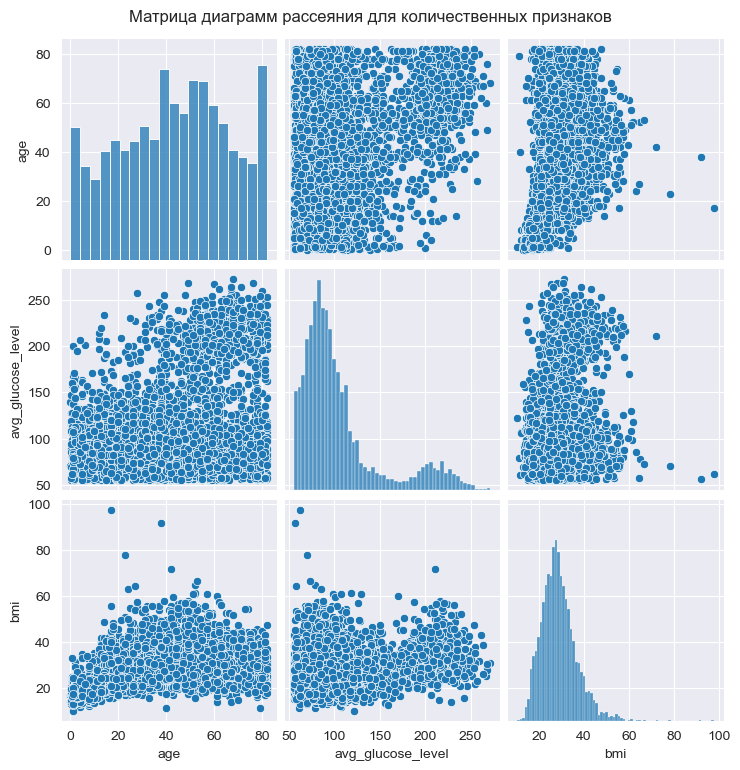

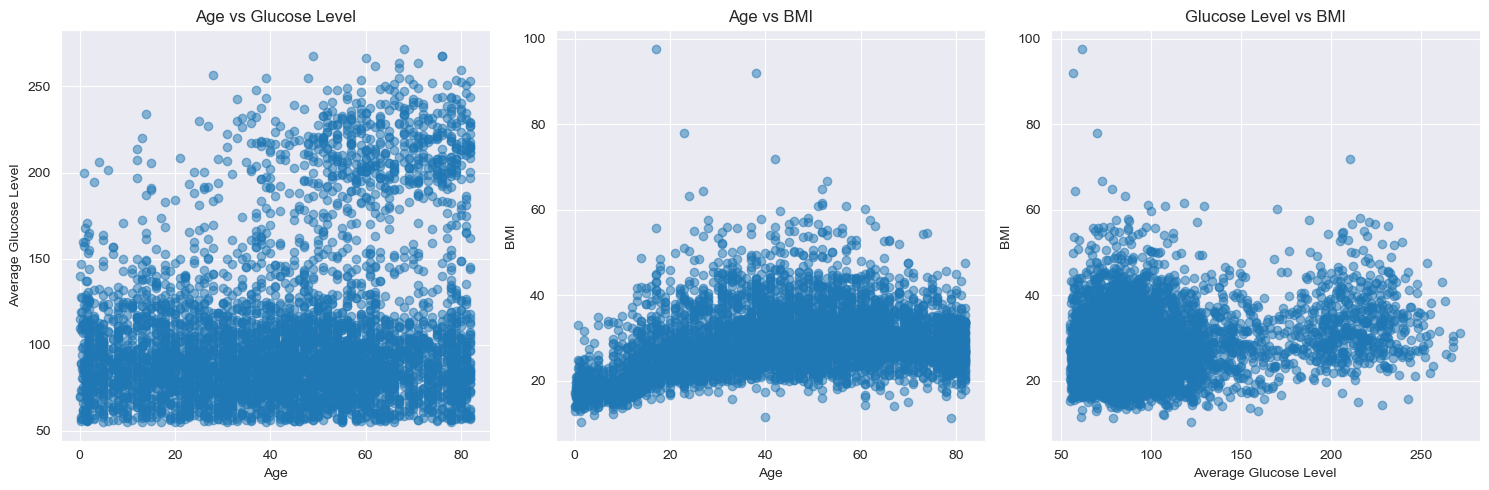

In [7]:
sns.pairplot(df_quant)
plt.suptitle("Матрица диаграмм рассеяния для количественных признаков", y=1.02)
plt.show()

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(df_quant['age'], df_quant['avg_glucose_level'], alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Average Glucose Level')
plt.title('Age vs Glucose Level')

plt.subplot(1, 3, 2)
plt.scatter(df_quant['age'], df_quant['bmi'], alpha=0.5)
plt.xlabel('Age')
plt.ylabel('BMI')
plt.title('Age vs BMI')

plt.subplot(1, 3, 3)
plt.scatter(df_quant['avg_glucose_level'], df_quant['bmi'], alpha=0.5)
plt.xlabel('Average Glucose Level')
plt.ylabel('BMI')
plt.title('Glucose Level vs BMI')

plt.tight_layout()
plt.show()

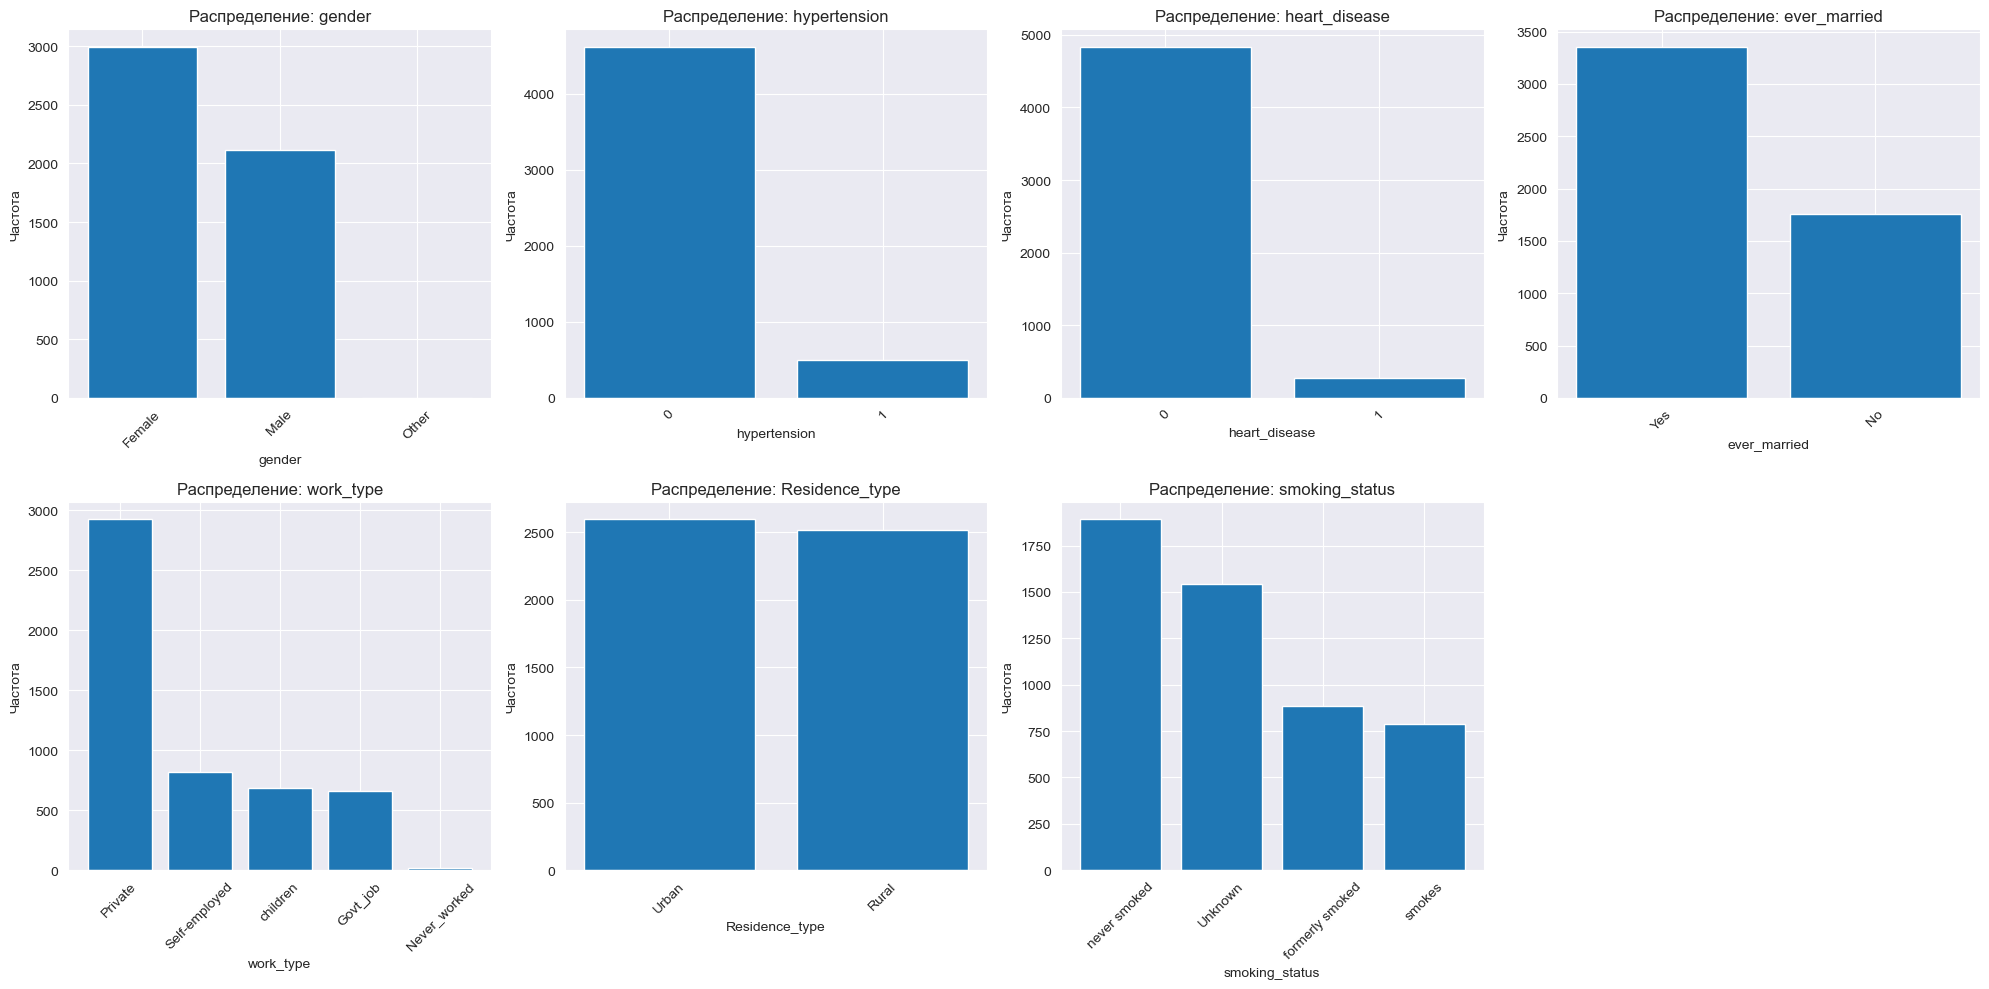

In [8]:
n_cols = len(df_cat.columns)
fig, axes = plt.subplots(2, (n_cols + 1) // 2, figsize=(20, 10))
axes = axes.flatten()

for i, col in enumerate(df_cat.columns):
    value_counts = df_cat[col].value_counts()
    axes[i].bar(value_counts.index.astype(str), value_counts.values)
    axes[i].set_title(f'Распределение: {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Частота')
    plt.setp(axes[i].xaxis.get_majorticklabels(), rotation=45)

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()